# <font color=red> Machine Learning Course on Coursera </font>
## Programming Exercise 4: <font color=blue>Neural Network Learning</font>

## <font color=green>Neural Network  </font>
>In the previous exercise, you implemented feedforward propagation for neural networks and used it to predict handwritten digits with the weights we provided. In this exercise, you will implement the backpropagation algorithm to learn the parameters for the neural network.


In [1]:
# Scientific and vector computation for python
import numpy as np

# Plotting library
import matplotlib.pyplot as plt

# Optimization module in scipy
from scipy import optimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

# will be used to transform the y
from pandas import get_dummies

# import of my own functions
import my_ML_functions
#set up
sigmoid = my_ML_functions.sigmoid

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Let's first import the data and visualize it

In [2]:
# 20x20 Input Images of Digits
input_layer_size  = 400

# 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)
num_labels = 10

#  training data stored in arrays X, y
data = loadmat('Data/MultiClass-ex3data1.mat')
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

m = y.size

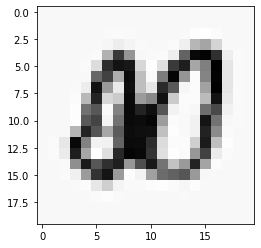

In [379]:
# Load randomly an image of the data set
item = np.random.randint(m)
img = X[item]
plt.imshow(img.reshape(20,20),cmap = plt.cm.Greys);

## Feedforward and Costfunction

In [4]:
# Loading the already optmized weights Theta_1 and Theta_2
weights =loadmat('Data/NeuralNet-ex4weights.mat')
Theta1,Theta2 = weights['Theta1'],weights['Theta2']
# swap first and last columns of Theta2, due to legacy from MATLAB indexing, 
# since the weight file ex3weights.mat was saved based on MATLAB indexing
Theta2 = np.roll(Theta2, 1, axis=0)

In [338]:
# Setup nnparam: Use ravel to transfrom matrix in vectors
nnparam = np.concatenate([Theta1.ravel(),Theta2.ravel()])

# Buil my model
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [5]:
def nnCostFunction(nnparam,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda):
    """Calculate the neural network cost and gradient regulaized functions
    Parameters:
    nnparam = vector that contains the weights
    input_layer_size = number of nodes in input layer
    hidden_layer_size = number of nodes in hidden layer
    num_labels = number of nodes in output layer
    X = matrices of m x n 
    """
    # First reshape the weight matrices
    Theta_1 = np.reshape(nnparam[:hidden_layer_size * (input_layer_size + 1)],
                     (hidden_layer_size, (input_layer_size + 1)))

    Theta_2 = np.reshape(nnparam[hidden_layer_size * (input_layer_size + 1):],
                     (num_labels, (hidden_layer_size + 1)))
    
    # add ones to Xp
    m,n = X.shape
    ones = np.ones((m,1))
    Xp = np.concatenate([ones,X],axis=1)

    # reshape the y
    y = get_dummies(y)
    
    #feedforward propagation
    z2 = Xp.dot(Theta_1.T)
    a2 = sigmoid(z2)
    #a2 = np.concatenate([ones,a2],axis=1)
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    #a2.shape,Theta2.shape
    z3 = a2.dot(Theta_2.T)
    a3 = sigmoid(z3)
    
    #regularization cost
    reg = np.sum(np.sum(np.square(Theta_1[0:,1:]))) + np.sum(np.sum(np.square(Theta_2[0:,1:])))
    #cost function
    J = (-1 / m) * np.sum(np.sum(y*np.log(a3) + (1-y)*np.log(1 - a3))) + (Lambda / (2 * m)) * reg
    
    return J

In [341]:
# Testing you nnCostfunction
# with Lambda = 0, Cost = 0.287629
# with Lambda = 1, Cost = 0.383770
Lambda = 0
cost,grad = nnCostFunction(nnparam,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda)
cost

0.28762916516131876

## Implementing BackPropagation
In this part of the exercise, you will implement the backpropagation algorithm to compute the gradient for the neural network cost function. You will need to complete the nnCostFunction.m so that it returns an appropriate value for grad. Once you have computed the gradient, you will be able to train the neural network by minimizing the cost function J(Θ) 

In [342]:
def sigmoid_deriv(z):
    """Calculate the derivative of the sigmoid function
    """
    sig_deriv = sigmoid(z) * (1 - sigmoid(z))
    return sig_deriv

In [343]:
def nnCostFunction(nnparams,input_layer_size,hidden_layer_size,num_labels,X,y,Lambda):
    """Calculate the neural network cost and gradient regulaized functions
    Parameters:
    nnparam = vector that contains the weights
    input_layer_size = number of nodes in input layer
    hidden_layer_size = number of nodes in hidden layer
    num_labels = number of nodes in output layer
    X = matrices of m x n 
    """
    # First reshape the weight matrices
    Theta_1 = np.reshape(nnparams[:hidden_layer_size * (input_layer_size + 1)],
                     (hidden_layer_size, (input_layer_size + 1)))

    Theta_2 = np.reshape(nnparams[hidden_layer_size * (input_layer_size + 1):],
                     (num_labels, (hidden_layer_size + 1)))
    
    # add ones to Xp
    m,n = X.shape
    ones = np.ones((m,1))
    Xp = np.concatenate([ones,X],axis=1)

    # reshape the y
    Y = get_dummies(y)
    
    #feedforward propagation
    z2 = Xp.dot(Theta_1.T)
    a2 = sigmoid(z2)
    #a2 = np.concatenate([ones,a2],axis=1)
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    #a2.shape,Theta2.shape
    z3 = a2.dot(Theta_2.T)
    a3 = sigmoid(z3)
    
    #regularization cost
    reg = np.sum(np.sum(np.square(Theta_1[0:,1:]))) + np.sum(np.sum(np.square(Theta_2[0:,1:])))
    #cost function
    J = (-1 / m) * np.sum(np.sum(Y*np.log(a3) + (1-Y)*np.log(1 - a3))) + (Lambda / (2 * m)) * reg
    
    #back propagation
    delta_3 =  a3 - Y.values
    delta_2 = (delta_3 @ Theta_2) * sigmoid_deriv(np.concatenate([np.ones((z2.shape[0],1)),z2[:,:]],axis=1))
    delta_2 = delta_2[:,1:]
    
    Delta_2 = delta_3.T.dot(a2)
    Delta_1 = delta_2.T.dot(Xp)

    #gradients
    temp1 = np.concatenate([np.zeros((Theta_1.shape[0],1)),Theta_1[:,1:]],axis=1)
    temp2 = np.concatenate([np.zeros((Theta_2.shape[0],1)),Theta_2[:,1:]],axis=1)
    
    grad_1 = (1 / m) * Delta_1 + (Lambda / m) * temp1
    grad_2 = (1 / m) * Delta_2 + (Lambda / m) * temp2
    
    grad = np.concatenate([grad_1.ravel(),grad_2.ravel()])

    return J, grad 

## Checking Gradients

In [344]:
def computeNumericalGradient(J, theta, e=1e-4):
    """
    Computes the gradient using finite differences"
    """
    numgrad = np.zeros(theta.shape)
    perturb = np.diag(e * np.ones(theta.shape))
    for i in range(theta.size):
        loss1, _ = J(theta - perturb[:, i])
        loss2, _ = J(theta + perturb[:, i])
        numgrad[i] = (loss2 - loss1)/(2*e)
    return numgrad

In [354]:
# Build a small Neural Network to check your gradients
input_layer_size = 5
hidden_layer_size = 3
num_labels = 3
m = 5
Lambda = 0

# Generates random weights, inputs and outputs
np.random.seed(2)
Theta1 = np.random.rand(hidden_layer_size, input_layer_size + 1)
Theta2 = np.random.rand(num_labels,hidden_layer_size + 1)

X_t = np.random.rand(m,input_layer_size)
y_t = np.arange(1, 1+m) % num_labels

# Unroll parameters
nnparams = np.concatenate([Theta1.ravel(), Theta2.ravel()])

# short hand for cost function
costFunc = lambda p: nnCostFunction(p, input_layer_size, hidden_layer_size,
                                        num_labels, X_t, y_t, Lambda)

# Calculate the gradients with your nnCostFunction and the finite size gradients
cost, grad = costFunc(nnparams)
numgrad = computeNumericalGradient(costFunc,nnparams)

# Compare the results of the two codes: Should be almost exactly the same
print(np.stack([numgrad,grad], axis=1))

[[0.01818218 0.01818218]
 [0.01040637 0.01040637]
 [0.00706085 0.00706085]
 [0.0118763  0.0118763 ]
 [0.00874809 0.00874809]
 [0.01114942 0.01114942]
 [0.06360681 0.06360681]
 [0.03098065 0.03098065]
 [0.02419464 0.02419464]
 [0.03906456 0.03906456]
 [0.03131861 0.03131861]
 [0.04023647 0.04023647]
 [0.04432645 0.04432645]
 [0.02757561 0.02757561]
 [0.01990417 0.01990417]
 [0.0287708  0.0287708 ]
 [0.01954413 0.01954413]
 [0.02604778 0.02604778]
 [0.5982196  0.5982196 ]
 [0.4723676  0.4723676 ]
 [0.47894738 0.47894738]
 [0.4994032  0.4994032 ]
 [0.35265865 0.35265865]
 [0.27888686 0.27888686]
 [0.2865675  0.2865675 ]
 [0.29555322 0.29555322]
 [0.28692582 0.28692582]
 [0.23275119 0.23275119]
 [0.23964323 0.23964323]
 [0.25258853 0.25258853]]


## Training Neural Network
> You can play with the Lambda value and with the number of nodes in the hidden layer to improve the accuracy of the neural network

In [7]:
# training data stored in arrays X, y
data = loadmat('Data/MultiClass-ex3data1.mat')
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

# Build my model
input_layer_size = 400
hidden_layer_size = 100
num_labels = 10
Lambda = 1

# random Initialization of the weights
np.random.seed(1)
Theta1 = 2*np.random.rand(hidden_layer_size,input_layer_size + 1) - 1
Theta2 = 2*np.random.rand(num_labels,hidden_layer_size + 1) - 1

# Setup nnparam: Use ravel to transfrom matrix in vectors
nnparam = np.concatenate([Theta1.ravel(),Theta2.ravel()],axis=0)

In [364]:
# Compile the model
options = {'maxiter': 100}
comp = optimize.minimize(nnCostFunction,nnparam,(input_layer_size,hidden_layer_size,num_labels,X,y,Lambda),
                 jac=True,method='TNC',options=options)

# Reshape the optimized weights
Theta1_opt = np.reshape(comp.x[:hidden_layer_size*(input_layer_size+1)],
                        (hidden_layer_size,(input_layer_size +1)))
Theta2_opt = np.reshape(comp.x[hidden_layer_size*(input_layer_size+1):],
                        (num_labels,(hidden_layer_size +1)))
comp.success
comp
print('Has my optimization converged ?',comp.success)
print('What is the func score ?',comp.fun)

Has my optimization converged ? False
What is the func score ? 1.0079815739564881


> If you modify the number of iterations in the optimizer and you setup Lambda = 1, you can reach an accuracy of almost 100% for you neural network. A good case of overfitting !

In [374]:
# Deploy your Optimized Neural Net
# add ones to Xp
m,n = X.shape
ones = np.ones((m,1))
Xp = np.concatenate([ones,X],axis=1)
    
#feedforward propagation
z2 = Xp.dot(Theta1_opt.T)
a2 = sigmoid(z2)
#a2 = np.concatenate([ones,a2],axis=1)
a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
#a2.shape,Theta2.shape
z3 = a2.dot(Theta2_opt.T)
a3 = sigmoid(z3)

# Accuracy of the Neural Net
prediction = np.argmax(a3,axis=1)
prediction
accuracy = np.mean(prediction == y) * 100
accuracy

96.82

## Visualize your Neural Net Prediction

My Neural Network prediction is a 7


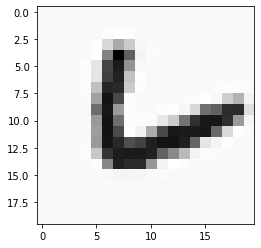

In [375]:
# select a random image among the data set
item = np.random.randint(m)
#
# What is the prediction of the Neural Net
print('My Neural Network prediction is a',prediction[item])
# plot the random image
img = X[item]
plt.imshow(img.reshape(20,20),cmap = plt.cm.Greys);

## Visualize the Hidden layer of the Neural Network

This is what the hidden node 16 sees


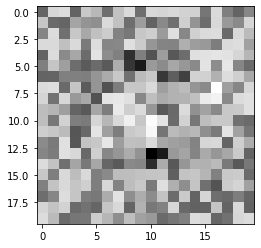

In [376]:
# select a random image among the data set
item = np.random.randint(hidden_layer_size)
#
# What is the prediction of the Neural Net
print('This is what the hidden node',item,'sees')
# plot the random image
img = Theta1_opt[item,1:]
plt.imshow(img.reshape(20,20),cmap = plt.cm.Greys);

Each hidden units is looking for one specific patern

# Let's do it with Keras !!

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras import optimizers

In [10]:
#Let's import again the data to avoid problems
# training data stored in arrays X, y
data = loadmat('Data/MultiClass-ex3data1.mat')
X, y = data['X'], data['y'].ravel()

# set the zero digit to 0, rather than its mapped 10 in this dataset
# This is an artifact due to the fact that this dataset was used in 
# MATLAB where there is no index 0
y[y == 10] = 0

Y = to_categorical(y) # convert your y's into vectors like the get_dummies functions (super important !)

m,n = X.shape
print('The number of training examples is of ',m)

The number of training examples is of  5000


In [404]:
# Build the model: 3 layers input (400 nodes), hidden (25 nodes), output (10 nodes)
model = Sequential([
  Dense(25, activation='sigmoid', input_shape=(400,)),
  Dense(10, activation='sigmoid'),
])

# Compiling the model
sgd = optimizers.SGD(lr=0.5)
model.compile(
  optimizer=sgd, #another choice is adam
  #optimizer='adam',
  loss='mean_squared_error', # another choice is categorical_crossentropy
  metrics=['accuracy'],
)

# Training the model
model.fit(
  X, # training data
  Y, # training targets
  epochs=10,
  batch_size=5, #divide your data set in n batches
);

Epoch 1/10
1000/1000 [==============================] - 2s 1ms/step - loss: 0.0999 - accuracy: 0.2753
Epoch 2/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0718 - accuracy: 0.5883
Epoch 3/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0517 - accuracy: 0.7408: 
Epoch 4/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0405 - accuracy: 0.8280
Epoch 5/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0337 - accuracy: 0.8600
Epoch 6/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0299 - accuracy: 0.8722
Epoch 7/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0262 - accuracy: 0.8840
Epoch 8/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0234 - accuracy: 0.8928
Epoch 9/10
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0222 - accuracy: 0.8996
Epoch 10/10
1000/1000 [==============================] - 2s 2ms/step - loss: 0.0

Let's now deploy the trained neural net !

My Neural Network prediction is a 8


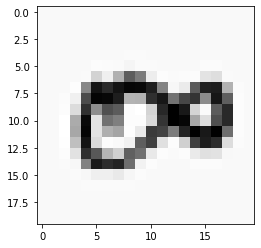

In [432]:
# select a random image among the data set
item = np.random.randint(m)
#
# What is the prediction of the Neural Net
nnPredict = np.argmax(model.predict(X[item].reshape(1,-1)))
print('My Neural Network prediction is a',nnPredict)
# plot the random image
img = X[item]
plt.imshow(img.reshape(20,20),cmap = plt.cm.Greys);